# SESSION 5 : LangGraph Core Concepts | Agentic AI using LangGraph | Video 4 

https://youtu.be/D5KhiCDM9XQ?list=PLKnIA16_RmvYsvB8qkUQuJmJNuiCUJFPL

## What is LangGraph


- LangGraph is an orchestration framework for building intelligent, stateful, and __multi-step__ LLM workflows.


- It enables advanced features like __parallelism, loops, branching, memory, and resumability__ — making it ideal for agentic and production-grade AI applications.


- It models your logic as a __graph of nodes__ (tasks) and __edges__ (routing) instead of a linear chain.


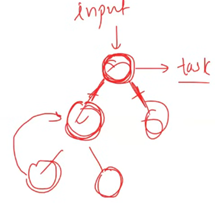

## LLM Workflow

An LLM workflow is the structured sequence of steps (or a pipeline) that defines how data flows into, through, and out of a Large Language Model (LLM) to solve a task.

Instead of directly calling an LLM with a prompt, workflows orchestrate multiple components like retrievers, tools, prompt templates, chains, agents, evaluators, and human feedback to achieve more complex, reliable, and production-ready outcomes.

Workflows can be linear, parallel, branched, or looped, allowing for complex behaviour like retries, multi-agent communication,  or tool -augmented reasoning

Think of it as:
👉 Raw Input → Preprocessing → LLM + Tools → Postprocessing → Output

### 🔹 Example of an LLM Workflow (Customer Support Bot)

1. User asks: *“What’s the refund policy for electronics?”*


2. Data preparation (cleaning, splitting, embedding text, etc.) : Parse text, identify intent → "Refund policy query."


3. Retrieval: Search company knowledge base → find refund policy document.


4. Prompt Template: Insert retrieved text into structured prompt.


5. LLM: Generates a natural-language response.


6. Post-processing (formatting output, validation, filtering): Check response for compliance with business rules.



7. Output: *“You can request a refund within 30 days for electronics, provided you keep the receipt.”*


8. Evaluation: Log response, score accuracy, monitor hallucinations.

### 🔹 Components of an LLM Workflow

1. **Input Layer**

   * Accepts user input (e.g., text, query, document).
   * May include **parsers** (for PDFs, docs) or **APIs**.


2. **Preprocessing**

   * Cleans and transforms input into structured format.
   * Steps: tokenization, chunking (e.g., text splitters), embedding generation.


3. **Retrieval / Knowledge Augmentation (RAG)**

   * Searches external knowledge bases (vector stores, databases, APIs).
   * Example: retrieving company policies to answer HR-related queries.


4. **Prompt Engineering / Templates**

   * Defines how the query and retrieved info are framed before passing to the LLM.
   * Includes format instructions, few-shot examples, role prompting.


5. **LLM Core**

   * The main model (GPT, LLaMA, Claude, etc.) processes the request.


6. **Tools & Agents**

   * LLM can call external tools (search, calculator, SQL, APIs).
   * Agents handle **decision-making** (when & which tool to use).


7. **Postprocessing**

   * Extracts structured results (JSON, SQL query, summary).
   * Includes validation, filtering, or business logic checks.


8. **Evaluation & Feedback**

   * Uses **metrics** (accuracy, hallucination detection).
   * Can include **human-in-the-loop** or automated evaluators (like RAGAS, LangSmith).


9. **Orchestration**

   * Ensures reliability with **control flow, retries, error handling, state management** (e.g., LangGraph, Prefect, Airflow).

### 🔹 Types of LLM Workflows

1. **Basic Prompt → Response**

   * The simplest workflow: send a prompt, get output.
   * Example: Ask GPT-4 *“Summarize this paragraph”*.

2. **Prompt Chaining**

   * Breaking a big task into smaller prompts.
   * __Multiple LLM calls in sequence__
   * Example: Extract key points → Generate summary → Rewrite in plain English.
   * we can also apply checks at various points.

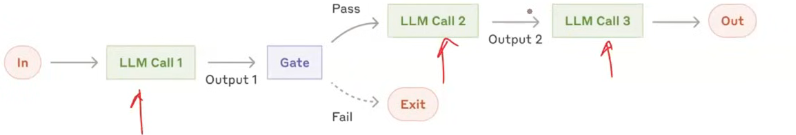

3. **Routing Workflow**


This pattern uses an LLM as a "router" to classify an incoming request and __direct it to the most appropriate tool or model for the job__. This is particularly useful for optimizing costs and performance, as it avoids using a large, expensive LLM for simple tasks.



**How it works:**

- A user's query is sent to a router LLM.

- The router LLM's task is to analyze the query and determine the user's intent.

- Based on the intent, the router directs the query to a specialized tool or LLM. For example, a query about a flight might be routed to an API that checks flight status, while a query about a product might be routed to a product information LLM.


- eg : Customer Service Bots: The bot first determines if the user's query is about a billing issue, a technical problem, or a simple question, then routes the request accordingly.

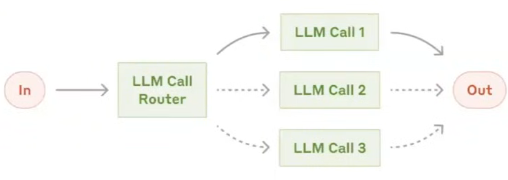

4. **Parallelization**


- Breaking a big task into smaller subtask, but all the subtasks are executed together parallely.


- eg : Youtube Content Moderation. All the checks are doen parallely.

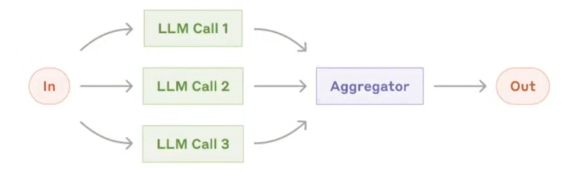

5. **Orchestration-Workers**


This is an advanced, more dynamic version of prompt chaining. A central "orchestrator" LLM plans out a complex task and delegates specific subtasks to different "worker" LLMs or other tools. The orchestrator is responsible for synthesizing the results and ensuring the overall goal is met.

**Similar to Parallel Workflow but here we don't know the nature of the task, it is done dynamically.**

#### How it works:

- The orchestrator receives a high-level request (e.g., "Write a travel itinerary for a week in Paris").



- The orchestrator creates a plan 
    1. (e.g., "1. Find popular attractions. 
    2. Get a list of top restaurants. 
    3. Suggest a day-by-day schedule. 
    4. Synthesize into a final itinerary.").



- __The orchestrator delegates each step to a different worker__. For example, one worker might use a search tool to find attractions, another might use a different model to format the itinerary, and so on.

#### Use cases:

1. __Complex Assistants :__ A virtual assistant that can book flights, reserve tables, and manage a schedule, using different APIs and tools for each subtask.



2. __Code Generation :__ An assistant that can generate, debug, and test code by breaking down the task into distinct steps and using specialized models or tools for each.

6. **Evaluator-Optimizer (Reflect-Refine Loop)**


This workflow is all about improving the quality and reliability of LLM output. __It can't be perfected in one go__. It introduces a feedback loop where an LLM's initial response is evaluated, and the feedback is used to generate a better version. 


__Here we use 2 LLMs : 1. LLM generator 2. LLM Evaluator__ 


#### How it works:

- An LLM generates a response to a prompt.



- A second LLM (the "evaluator") or a set of programmatic checks analyzes the response against specific criteria (e.g., factual accuracy, tone, length).



- The evaluator's feedback is then given to the first LLM, prompting it to "reflect" and "refine" its original response.



- This process can be repeated in a loop until the output meets a predefined standard.

#### Use cases:

- High-Stakes Content: Generating legal documents, financial reports, or medical summaries where accuracy is paramount.


- Creative Writing: Refining a story or poem by having an evaluator LLM provide feedback on plot holes, character consistency, or writing style.

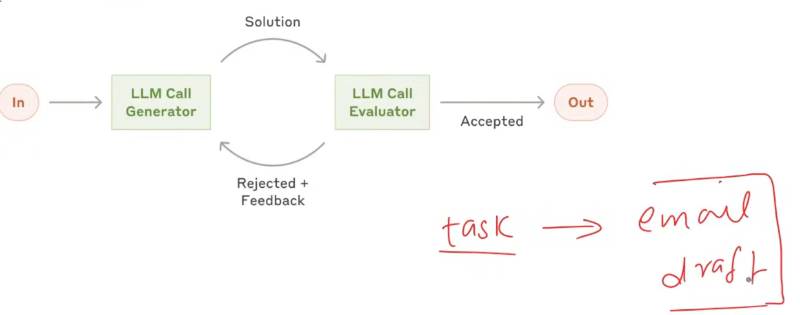

7. **Retrieval-Augmented Generation (RAG)** -

   * Fetch external knowledge (via vector DB, search, etc.) before LLM generates.
   * Example: If a query comes from customer for  customer support. LLM will decide whether the query is technical, refund, product isuue etc.  

8. **Agentic Workflows**

   * LLM acts as an *agent*, making decisions step by step using **tools, APIs, or other models**.
   * Example: ReAct (Reason + Act) → LLM decides: *search web → analyze result → give answer*.


### 🔹 Why Do We Need LLM Workflows?

* **Scalability** → Handle thousands of queries with orchestration.


* **Reliability** → Reduce hallucinations with retrieval + validation.


* **Observability** → Track failures and model outputs.


* **Flexibility** → Plug different models, retrievers, and evaluators.


* **Transparency & Control**  → Easier debugging and monitoring.


* **Production-readiness**  → Integrates with business apps, APIs, databases.

---

✅ In short: **LLM workflows are production-grade pipelines for building AI systems around LLMs, combining preprocessing, retrieval, prompting, reasoning, tool use, and evaluation.**


## Graphs, Nodes, Edges


__Example :__ USPC essay writing

The system generates an essay topic, collects the student's submission, and evaluates it in parallel on depth of analysis, language quality, and clarity of thought. Based on the combined score, it either gives feedback for improvement or approves the essay.




* **Step 1. GenerateTopic**
    * System generates a relevant UPSC-style essay topic and presents it to the student.
    
    
    
* **Step 2. CollectEssay**
    * Student writes and submits the essay based on the generated topic.
    
    
    
* **Step 3. EvaluateEssay (Parallel Evaluation Block)**
    * Three evaluation tasks run in parallel:
        * **EvaluateDepth** - Analyzes depth of analysis, argument strength, and critical thinking.
        * **EvaluateLanguage** - Checks grammar, vocabulary, fluency, and tone.
        * **EvaluateClarity** - Assesses coherence, logical flow, and clarity of thought.
        
        
        
* **Step 4. AggregateResults**
    * Combines the three scores and generates a total score (e.g., out of 15).
    
    
    
* **Step 5. ConditionalRouting**
    * Based on the total score:
        * If score meets threshold $\rightarrow$ go to **ShowSuccess**
        * If score is below threshold $\rightarrow$ go to **GiveFeedback**
        
        
        
* **Step 6. GiveFeedback**
    * Provides targeted suggestions for improvement in weak areas.
    
    
    
* **7. CollectRevision (optional loop)**
    * Student resubmits the revised essay.
    * Loop back to **EvaluateEssay**
    
    
    
* **Step 8. ShowSuccess**
    * Congratulates the student and ends the flow.

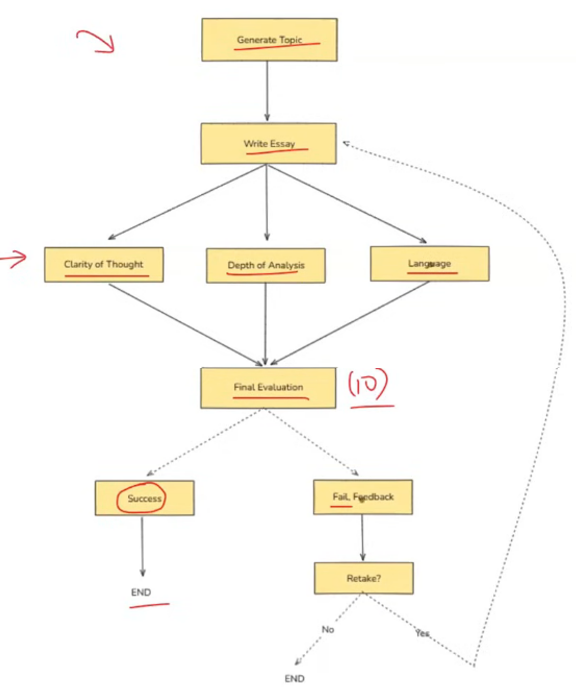



### 🔹 **Nodes in LangGraph**

* A **node** is a building block (a step) in your workflow.


* Each node represents a **unit of computation**:

  * An **LLM call**
  * A **retriever** (vector DB lookup)
  * A **tool** (SQL, calculator, API)
  * A **custom function** (data cleaning, validation, formatting)


* Nodes are where the "work" happens.

👉 Think: **nodes = tasks in the workflow.**

### 🔹 **Edges in LangGraph**

* An **edge** defines the **flow of data or control** between nodes.


* Edges tell the system **what happens next** after a node finishes.


* They can be:

  * **Normal edges** → simple step-to-step flow.
  * **Conditional edges** → branch logic (if condition A → go here, else → go there).
  * **Event-driven edges** → wait for input/human feedback, then continue.

👉 Think: **edges = connections (dependencies) between tasks.**

### 🔹 Example (Simple Q\&A Workflow in LangGraph)

Let’s say we build a **RAG chatbot**:

* **Nodes**:

  1. **User Input Node** → takes user query.
  2. **Retriever Node** → fetches relevant documents.
  3. **LLM Node** → generates answer using query + docs.
  4. **Validation Node** → checks hallucinations.
  5. **Output Node** → returns final answer.



* **Edges**:

  * Edge: Input → Retriever
  * Edge: Retriever → LLM
  * Edge: LLM → Validator
  * Conditional Edge: Validator → (Pass → Output) / (Fail → Ask User Clarification)

So, nodes = steps, edges = arrows connecting steps.

✅ In short:

* **Nodes** = the **work units** (LLM, tools, functions).


* **Edges** = the **wires** that connect nodes and decide the execution flow.

## State -> TypdedDict is used



In **LangGraph**, **state** is the memory/context that is **persisted and passed** between nodes as the workflow runs.

* It captures **intermediate results**, tool outputs, and conversation history. __This is the data being passed between nodes of graph runs__


* Unlike plain LangChain (which is mostly stateless unless you add memory), **LangGraph workflows are stateful by design**.


* State keeps on updating when passing through multiple nodes. __State is mutable__


* This makes it possible to handle **long-running, event-driven, or multi-step workflows** (like agents that wait for user input).

👉 Think of **state** as the "shared notebook" where every node writes its outputs, and the next node can read from it.

__NOTE :__

> __For any Node exceution first we need to define the state as input. After the execution the node make changes in the state. This state is sent to next node and after execution the next node makes changes__

#### For essay execution example above, we need these things throughout the workflow

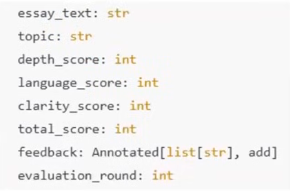

### 🔹 Key Properties of State

1. **Persistent** → survives across nodes and workflow steps.


2. **Composable** → can store structured data (dicts, JSON, objects).


3. **Dynamic** → updated as the workflow progresses (each node can add/edit).


4. **Serializable** → can be saved/loaded (important for retries & fault tolerance).

### 🔹 Example of State Flow

Imagine a **loan approval workflow**:

1. **Input Node** → User submits application.

   * State = `{ "applicant_name": "John", "loan_amount": 50_000 }`


2. **Credit Check Node** → Calls API for credit score.

   * State updates → `{ "credit_score": 720 }`


3. **LLM Decision Node** → Uses policy + credit score to draft approval.

   * State updates → `{ "decision": "Approved", "reason": "Good credit score" }`


4. **Human Review Node** → Adds reviewer’s feedback.

   * State updates → `{ "reviewer_comment": "Proceed with caution." }`

✅ At the end, the full **state** contains the *entire journey* of that loan application.

### 🔹 Why State Matters

* **Event-driven workflows** → LLM agents can pause and wait for human input, then continue.


* **Observability** → you can inspect the full trail of reasoning & tool use.


* **Fault tolerance** → if the workflow crashes, you can resume from the saved state.


* **Branching & conditions** → decisions depend on values stored in state.



✅ **In short:**
**State in LangGraph is the structured memory that flows through nodes, records all intermediate steps, and makes workflows persistent, debuggable, and resumable.**

## Reducers

* In LangGraph, the **state** is usually a dictionary (`dict`) that gets updated as nodes run.


* But sometimes **multiple nodes may try to update the same key in the state** (e.g., multiple tools returning results).


* Each key in state can have their own reducer.


* A **reducer** is a function that defines **how to merge these updates**. Will it be update, remove, replace, merge or add to existing values




👉 Think of it like in **functional programming (Redux, Spark, etc.)** — a reducer takes the **old state + new update** and produces the **next state**.

### 🔹 Why Do We Need Reducers?

Because without reducers, the system wouldn’t know **what to do if two nodes both try to update the same key**.

Example:

* Node A writes `{"messages": ["Hello"]}`
* Node B writes `{"messages": ["How are you?"]}`

Should the new state be:

* `["How are you?"]` (overwrite) ❌
* `["Hello", "How are you?"]` (append) ✅

Reducers let you control this.

### 🔹 Example in LangGraph

Say we define state like this:

```python
from langgraph.graph import StateGraph

# Define schema for state
class State(dict):
    messages: list[str]

# Create graph
graph = StateGraph(State)

# Define a reducer for "messages"
graph.add_reducer("messages", lambda old, new: (old or []) + new)
```

Now, if two nodes both update `state["messages"]`, the reducer ensures they get **appended** instead of overwritten.

### 🔹 Types of Reducers (Common Patterns)

1. **Overwrite Reducer** (default)

   * New value replaces old.

   ```python
   def overwrite(old, new):
       return new
   ```



2. **Append Reducer** (useful for conversation history, logs)

   ```python
   def append_list(old, new):
       return (old or []) + new
   ```



3. **Merge Reducer** (combine dictionaries)

   ```python
   def merge_dicts(old, new):
       return {**(old or {}), **new}
   ```

### 🔹 Analogy

* **State** = the notebook where all outputs are written.


* **Reducers** = the rules for resolving conflicts when multiple people try to write on the *same page*.



✅ **In short:**
Reducers in LangGraph are **merge functions** that define how to update state keys when multiple nodes write to them. They make workflows predictable and prevent accidental overwriting of important context.


## Stages in LangGraph Execution Model

* **1. Graph Definition** (create the graph)
    * You define:
        * The **state schema** (typeddict)
        * **Nodes** (functions that perform tasks)
        * **Edges** (which node connects to which)


* **2. Compilation** : check if graph structure and logic is correct
    * You call `.compile()` on the `StateGraph`.
    * Orphaned node should not be there
    * This checks the graph structure and prepares it for execution.

#### Exceution phase will start now 


* **3. Invocation**
    * graph first node will be given the initial state.
    * You run the graph with `.invoke(initial_state)`.
    * LangGraph sends the initial state as a **message** to the entry node(s).
    * Node gets activated and the state gets updated. The next node gets the update state through edges. This is called __message passing.__  

    
    
* **4. Super-Steps Begin**
    * Execution proceeds in rounds. One node to the other.
    * __Called Super-step as multiple parallel steps work together in a go.__
    * In each round (super-step):
        * All **active nodes** (those that received messages) run in parallel
        * Each returns an **update** (message) to the state


* **5. Message Passing & Node Activation**
    * The messages are passed to downstream nodes via edges.
    * Nodes that receive messages become active for the next round.



* **6. Halting Condition**
    * Execution stops when:
        * No nodes are active, and
        * No messages are in transit

### OR

1. **Define State Schema**

   * Decide what information the workflow will carry (e.g., `{"messages": [], "context": {}}`).
   * Add reducers to handle updates (append, merge, overwrite).



2. **Build the Graph (Nodes + Edges)**

   * **Nodes** = tasks (LLM calls, tools, retrievers, custom functions).
   * **Edges** = connections that define control flow (normal, conditional, event-driven).



3. **Initialize State**

   * Workflow starts with an **initial state** (e.g., user input stored as `{"messages": ["Hi"]}`).



4. **Node Execution**

   * A node reads from the current state.
   * Performs its task (e.g., query DB, call LLM).
   * Produces an update to the state.



5. **Reducer Application**

   * If multiple nodes update the same key, **reducers** decide how to merge those updates into the state.



6. **State Update**

   * After reducer logic, the global state is updated.
   * The updated state is passed forward along outgoing edges.



7. **Edge Traversal (Control Flow)**

   * The graph determines **which node(s) to run next** based on:

     * Fixed sequence
     * Conditional logic (if/else)
     * Events (waiting for human input, external API, etc.)



8. **Iteration / Loops (if defined)**

   * Graph can re-enter nodes until conditions are met (e.g., retry until tool succeeds).



9. **Checkpointing (Optional)**

   * State can be **persisted** (saved) so the workflow can resume later if interrupted.



10. **Completion / Output**

* When execution reaches a terminal node, the **final state** represents the workflow’s result.
* Output is extracted and returned to the user/system.

✅ **In short:**


LangGraph execution is basically:
**State Schema → Graph Definition → Initialize → Execute Node → Apply Reducers → Update State → Traverse Edges → Repeat until Done → Final Output.**
